In [ ]:
#@title Install dependencies
%%bash -s $use_amber $use_templates

set -e

USE_AMBER=$1
USE_TEMPLATES=$2

if [ ! -f COLABFOLD_READY ]; then
  # install dependencies
  # We have to use "--no-warn-conflicts" because colab already has a lot preinstalled with requirements different to ours
  pip install -q --no-warn-conflicts "colabfold[alphafold-minus-jax] @ git+https://github.com/sokrypton/ColabFold"
  # high risk high gain
  pip install -q "jax[cuda11_cudnn805]>=0.3.8,<0.4" -f https://storage.googleapis.com/jax-releases/jax_releases.html
  touch COLABFOLD_READY
fi

# setup conda
if [ ${USE_AMBER} == "True" ] || [ ${USE_TEMPLATES} == "True" ]; then
  if [ ! -f CONDA_READY ]; then
    wget -qnc https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
    bash Miniconda3-latest-Linux-x86_64.sh -bfp /usr/local 2>&1 1>/dev/null
    rm Miniconda3-latest-Linux-x86_64.sh
    touch CONDA_READY
  fi
fi
# setup template search
if [ ${USE_TEMPLATES} == "True" ] && [ ! -f HH_READY ]; then
  conda install -y -q -c conda-forge -c bioconda kalign2=2.04 hhsuite=3.3.0 python=3.7 2>&1 1>/dev/null
  touch HH_READY
fi
# setup openmm for amber refinement
if [ ${USE_AMBER} == "True" ] && [ ! -f AMBER_READY ]; then
  conda install -y -q -c conda-forge openmm=7.5.1 python=3.7 pdbfixer 2>&1 1>/dev/null
  touch AMBER_READY
fi
pip install simtk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


You are logged into Google Drive and are good to go!
2022-08-16 11:55:04,367 Found 5 citations for tools or databases
2022-08-16 11:55:09,117 Query 1/1: C0304_VAKSHNIAL_e739a (length 189)


COMPLETE: 100%|██████████| 300/300 [elapsed: 00:01 remaining: 00:00]


2022-08-16 11:55:13,366 Running model_1
2022-08-16 12:00:09,141 model_1 took 295.8s (48 recycles) with pLDDT 95.9, ptmscore 0.916 and iptm 0.927


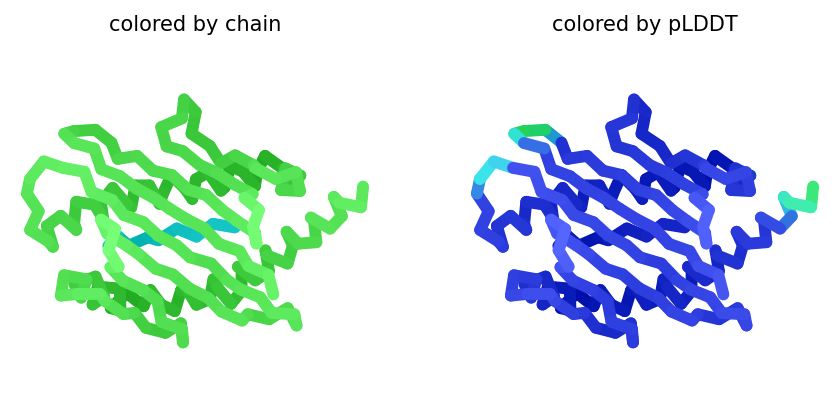

2022-08-16 12:00:25,727 Running model_2
2022-08-16 12:04:57,076 model_2 took 271.3s (48 recycles) with pLDDT 95.5, ptmscore 0.91 and iptm 0.919


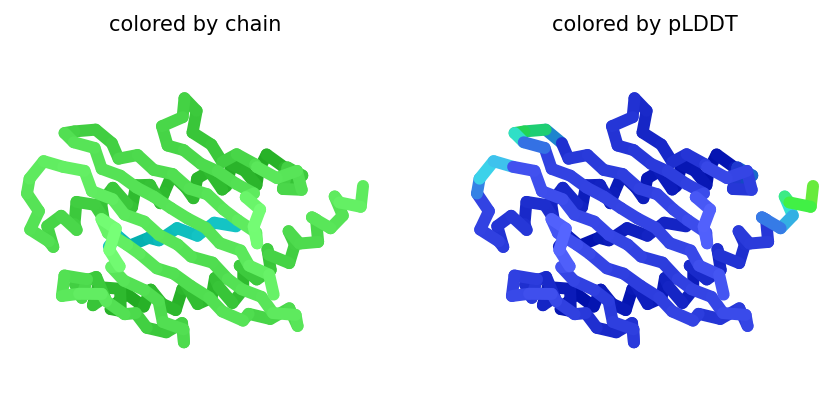

2022-08-16 12:05:13,556 Running model_3
2022-08-16 12:09:45,348 model_3 took 271.8s (48 recycles) with pLDDT 93.1, ptmscore 0.893 and iptm 0.687


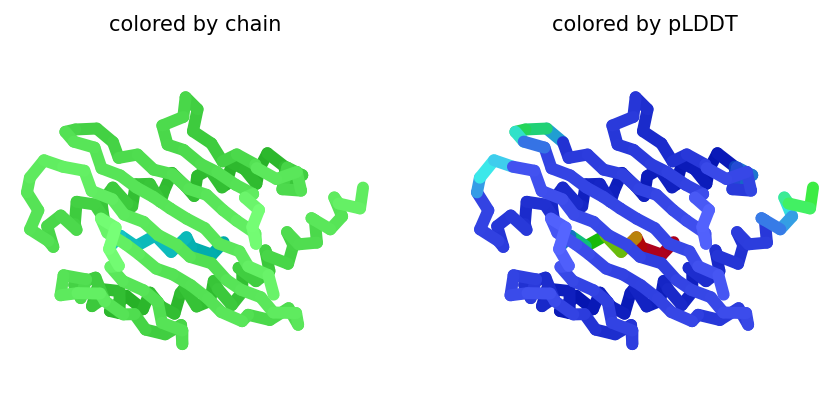

2022-08-16 12:10:01,801 Running model_4
2022-08-16 12:14:33,711 model_4 took 271.9s (48 recycles) with pLDDT 95.4, ptmscore 0.912 and iptm 0.913


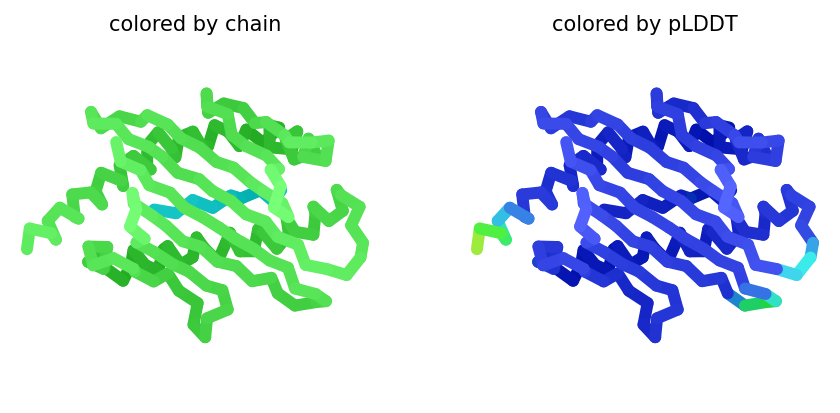

2022-08-16 12:14:49,991 Running model_5
2022-08-16 12:19:21,301 model_5 took 271.3s (48 recycles) with pLDDT 95.5, ptmscore 0.911 and iptm 0.91


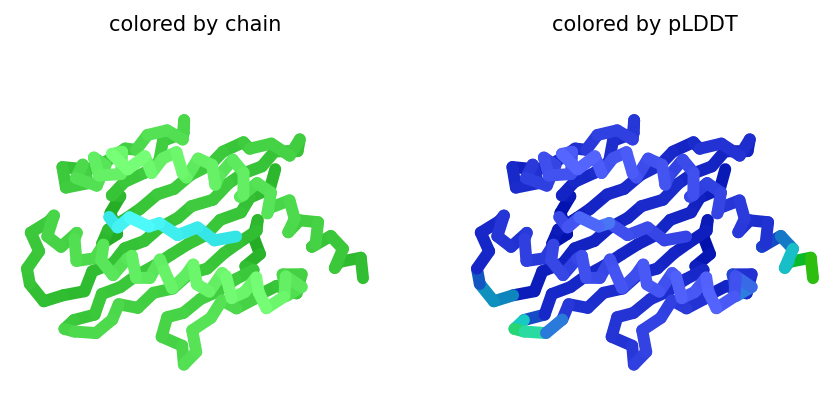

2022-08-16 12:19:37,629 reranking models by multimer
2022-08-16 12:19:39,335 Done


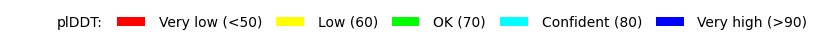


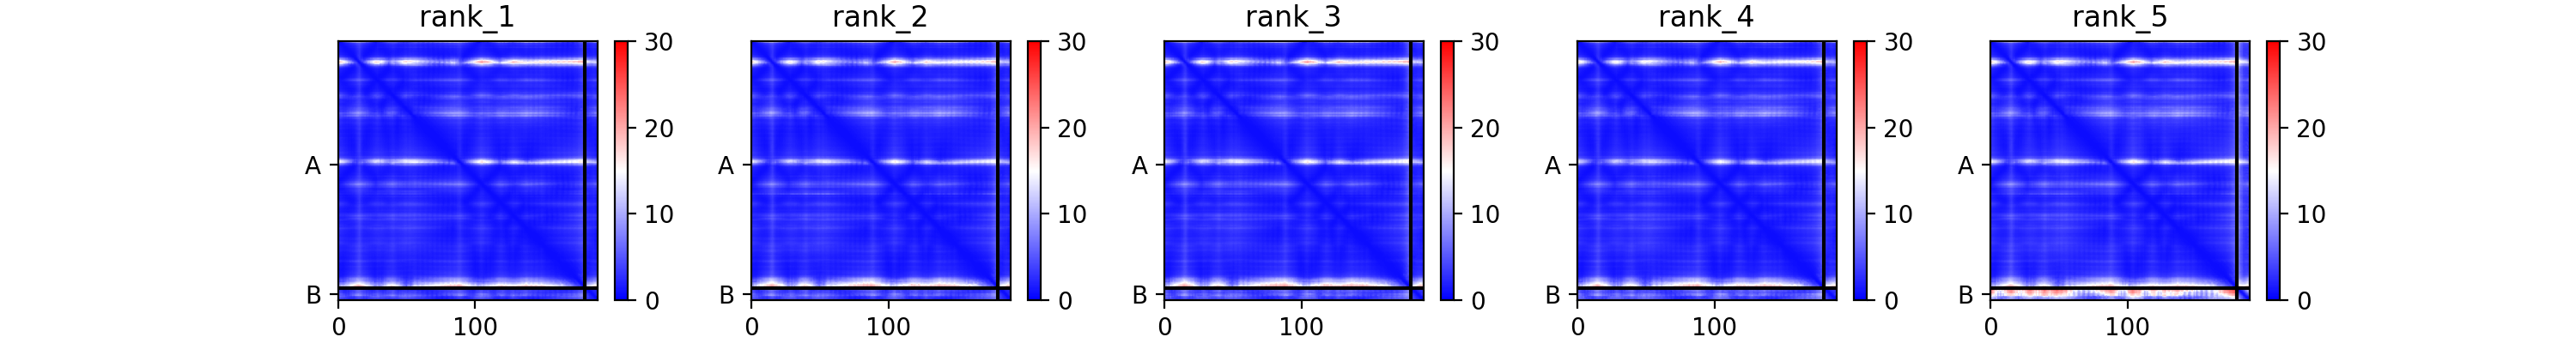
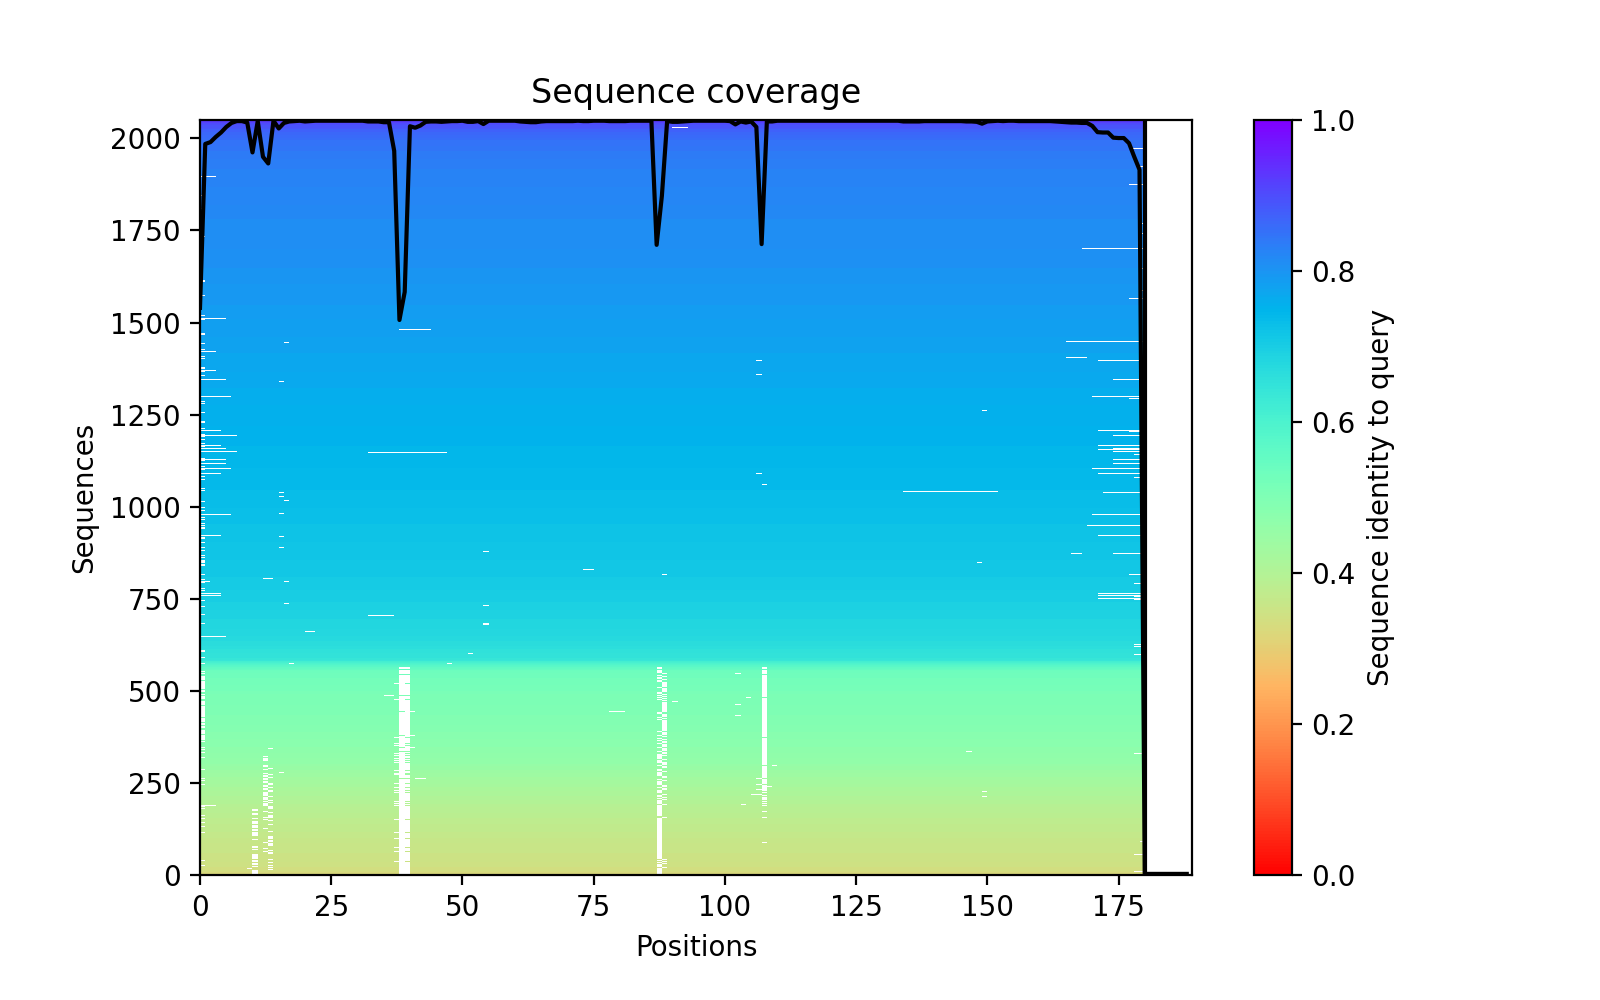
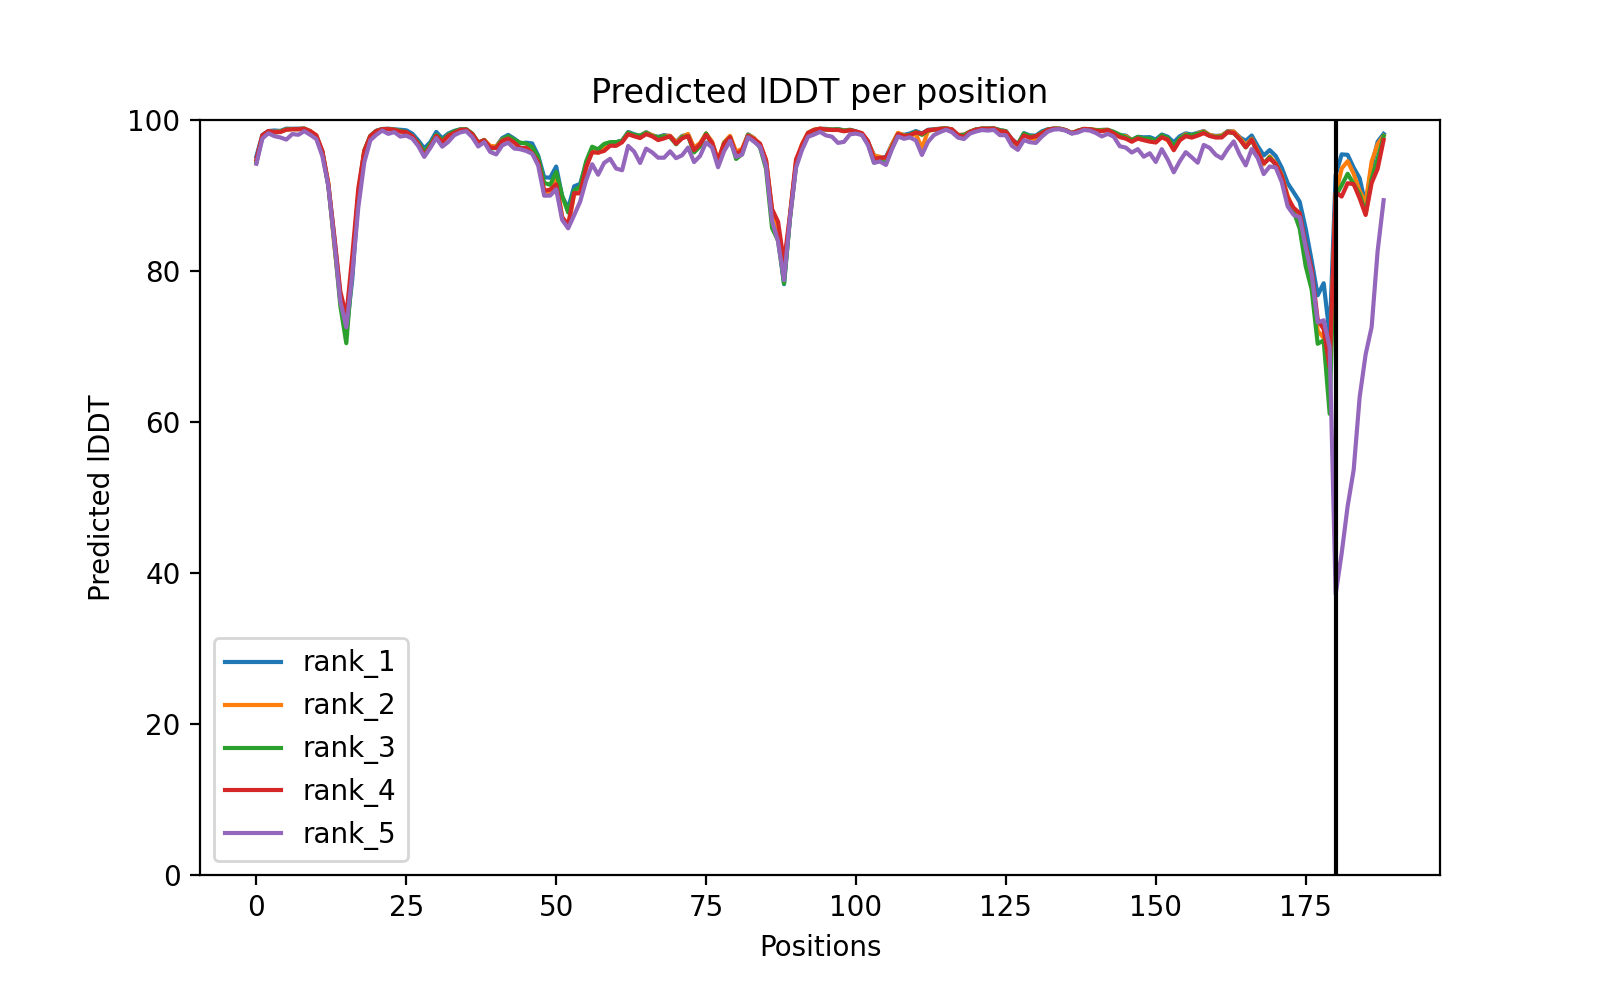

  adding: config.json (deflated 49%)
  adding: C0304_VAKSHNIAL_e739a_predicted_aligned_error_v1.json (deflated 92%)
  adding: C0304_VAKSHNIAL_e739a_unrelaxed_rank_1_model_1_scores.json (deflated 73%)
  adding: C0304_VAKSHNIAL_e739a_unrelaxed_rank_2_model_2_scores.json (deflated 73%)
  adding: C0304_VAKSHNIAL_e739a_unrelaxed_rank_3_model_4_scores.json (deflated 73%)
  adding: C0304_VAKSHNIAL_e739a_unrelaxed_rank_4_model_5_scores.json (deflated 73%)
  adding: C0304_VAKSHNIAL_e739a_unrelaxed_rank_5_model_3_scores.json (deflated 72%)
  adding: C0304_VAKSHNIAL_e739a.a3m (deflated 66%)
  adding: C0304_VAKSHNIAL_e739a_unrelaxed_rank_1_model_1.pdb (deflated 78%)
  adding: C0304_VAKSHNIAL_e739a_unrelaxed_rank_2_model_2.pdb (deflated 78%)
  adding: C0304_VAKSHNIAL_e739a_unrelaxed_rank_3_model_4.pdb (deflated 78%)
  adding: C0304_VAKSHNIAL_e739a_unrelaxed_rank_4_model_5.pdb (deflated 78%)
  adding: C0304_VAKSHNIAL_e739a_unrelaxed_rank_5_model_3.pdb (deflated 78%)
  adding: cite.bibtex (deflated 5

In [ ]:
from google.colab import files
import os.path
import re
import hashlib
import random

def add_hash(x,y):
  return x+"_"+hashlib.sha1(y.encode()).hexdigest()[:5]

job_dict = {'C0401_apo': 'SHSMRYFSTSVSWPGRGEPRFIAVGYVDDTQFVRFDSDAASPRGEPREPWVEQEGPEYWDRETQKYKRQAQADRVNLRKLRGYYNQSEDGSHTLQRMFGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAAREAEQRRAYLEGTCVEWLRRYLENGKETLQR',
 'C0701_apo': 'SHSMRYFDTAVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQNYKRQAQADRVSLRNLRGYYNQSEDGSHTLQRMYGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAADTAAQITQRKLEAARAAEQLRAYLEGTCVEWLRRYLENGKETLQR',
 'C1203_apo': 'SHSMRYFYTAVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQADRVSLRNLRGYYNQSEAGSHTLQWMYGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAAREAEQWRAYLEGTCVEWLRRYLENGKETLQR',
 'C1601_apo': 'SHSMRYFYTAVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQTDRVSLRNLRGYYNQSEAGSHTLQWMYGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAARAAEQQRAYLEGTCVEWLRRYLENGKETLQR',
 'C0302_apo': 'SHSMRYFYTAVSRPGRGEPHFIAVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQTDRVSLRNLRGYYNQSEAGSHILQRMYGCDVGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAAREAEQLRAYLEGLCVEWLRRYLKNGKETLQR',
 'C0304_apo': 'SHSMRYFYTAVSRPGRGEPHFIAVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQTDRVSLRNLRGYYNQSEAGSHIIQRMYGCDVGPDGRLLRGYDQYAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAAREAEQLRAYLEGLCVEWLRRYLKNGKETLQR',
 'C0602_apo': 'SHSMRYFDTAVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQADRVNLRKLRGYYNQSEDGSHTLQWMYGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAAREAEQWRAYLEGTCVEWLRRYLENGKETLQR',
 'C0804_apo': 'SHSMRYFYTAVSRPGRGEPRFIAVGYVDDTQFVQFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQTDRVSLRNLRGYYNQSEAGSHTLQRMYGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAADKAAQITQRKWEAAREAEQLRAYLEGTCVEWLRRYLENGKKTLQR',
 'C0210_apo': 'SHSMRYFYTAVSRPSRGEPHFIAVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQTDRVNLRKLRGYYNQSEAGSHTLQRMYGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAAREAEQWRAYLEGECVEWLRRYLENGKETLQR',
 'C1802_apo': 'SHSMRYFDTAVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQADRVNLRKLRGYYNQSEDGSHTLQRMFGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAAREAEQRRAYLEGTCVEWLRRYLENGKETLQR',
 'C0718_apo': 'SHSMRYFDTAVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQNYKRQAQADRVSLRNLRGYYNQSEDGSHTLQRMYGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAADTAAQITQRKLEAARAAEQLRAYLEGTCVEWLRRYLENGKETLQR',
 'C0802_apo': 'SHSMRYFYTAVSRPGRGEPRFIAVGYVDDTQFVQFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQTDRVSLRNLRGYYNQSEAGSHTLQRMYGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAADKAAQITQRKWEAAREAEQRRAYLEGTCVEWLRRYLENGKKTLQR',
 'C0702_apo': 'SHSMRYFDTAVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQADRVSLRNLRGYYNQSEDGSHTLQRMSGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAADTAAQITQRKLEAARAAEQLRAYLEGTCVEWLRRYLENGKETLQR',
 'C0202_apo': 'SHSMRYFYTAVSRPSRGEPHFIAVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQTDRVNLRKLRGYYNQSEAGSHTLQRMYGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAAREAEQWRAYLEGECVEWLRRYLENGKETLQR',
 'C0501_apo': 'SHSMRYFYTAVSRPGRGEPRFIAVGYVDDTQFVQFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQTDRVNLRKLRGYYNQSEAGSHTLQRMYGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAADKAAQITQRKWEAAREAEQRRAYLEGTCVEWLRRYLENGKKTLQR',
 'C1701_apo': 'SHSMRYFYTAVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQADRVNLRKLRGYYNQSEAGSHTIQRMYGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAADTAAQISQRKLEAAREAEQLRAYLEGECVEWLRGYLENGKETLQR',
 'C0303_apo': 'SHSMRYFYTAVSRPGRGEPHFIAVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQTDRVSLRNLRGYYNQSEARSHIIQRMYGCDVGPDGRLLRGYDQYAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAAREAEQLRAYLEGLCVEWLRRYLKNGKETLQR',
 'C1402_apo': 'SHSMRYFSTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQTDRVSLRNLRGYYNQSEAGSHTLQWMFGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAAREAEQRRAYLEGTCVEWLRRYLENGKETLQR',
 'C1801_apo': 'SHSMRYFDTAVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQADRVNLRKLRGYYNQSEDGSHTLQRMFGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAAREAEQRRAYLEGTCVEWLRRYLENGKETLQR',
 'C0102_apo': 'SHSMKYFFTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQTDRVSLRNLRGYYNQSEAGSHTLQWMCGCDLGPDGRLLRGYDQYAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAAREAEQRRAYLEGTCVEWLRRYLENGKETLQR',
 'C0704_apo': 'SHSMRYFDTAVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQADRVSLRNLRGYYNQSEDGSHTFQRMYGCDLGPDGRLLRGYDQFAYDGKDYIALNEDLRSWTAADTAAQITQRKLEAARAAEQDRAYLEGTCVEWLRRYLENGKKTLQR',
 'C0706_apo': 'SHSMRYFDTAVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQNYKRQAQADRVSLRNLRGYYNQSEDGSHTLQRMYGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAADTAAQITQRKLEAARAAEQLRAYLEGTCVEWLRRYLENGKETLQR'
 'C0304_VAKSHNIAL': 'SHSMRYFYTAVSRPGRGEPHFIAVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQTDRVSLRNLRGYYNQSEAGSHIIQRMYGCDVGPDGRLLRGYDQYAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAAREAEQLRAYLEGLCVEWLRRYLKNGKETLQR:VAKSHNIAL'
 }


for j in job_dict:
    query_sequence = job_dict[j]

    # remove whitespaces
    query_sequence = "".join(query_sequence.split())

    jobname = j
    # remove whitespaces
    basejobname = "".join(jobname.split())
    basejobname = re.sub(r'\W+', '', basejobname)
    jobname = add_hash(basejobname, query_sequence)
    while os.path.isfile(f"{jobname}.csv"):
      jobname = add_hash(basejobname, ''.join(random.sample(query_sequence,len(query_sequence))))

    with open(f"{jobname}.csv", "w") as text_file:
        text_file.write(f"id,sequence\n{jobname},{query_sequence}")

    queries_path=f"{jobname}.csv"

    # number of models to use
    use_amber = False #@param {type:"boolean"}
    template_mode = "none" #@param ["none", "pdb70","custom"]
    #@markdown - "none" = no template information is used, "pdb70" = detect templates in pdb70, "custom" - upload and search own templates (PDB or mmCIF format, see [notes below](#custom_templates))

    if template_mode == "pdb70":
      use_templates = True
      custom_template_path = None
    elif template_mode == "custom":
      custom_template_path = f"{jobname}_template"
      os.mkdir(custom_template_path)
      uploaded = files.upload()
      use_templates = True
      for fn in uploaded.keys():
        os.rename(fn, f"{jobname}_template/{fn}")
    else:
      custom_template_path = None
      use_templates = False

    #@markdown ### MSA options (custom MSA upload, single sequence, pairing mode)
    msa_mode = "MMseqs2 (UniRef+Environmental)" #@param ["MMseqs2 (UniRef+Environmental)", "MMseqs2 (UniRef only)","single_sequence","custom"]
    pair_mode = "unpaired+paired" #@param ["unpaired+paired","paired","unpaired"] {type:"string"}
    #@markdown - "unpaired+paired" = pair sequences from same species + unpaired MSA, "unpaired" = seperate MSA for each chain, "paired" - only use paired sequences.

    # decide which a3m to use
    if msa_mode.startswith("MMseqs2"):
      a3m_file = f"{jobname}.a3m"
    elif msa_mode == "custom":
      a3m_file = f"{jobname}.custom.a3m"
      if not os.path.isfile(a3m_file):
        custom_msa_dict = files.upload()
        custom_msa = list(custom_msa_dict.keys())[0]
        header = 0
        import fileinput
        for line in fileinput.FileInput(custom_msa,inplace=1):
          if line.startswith(">"):
             header = header + 1
          if not line.rstrip():
            continue
          if line.startswith(">") == False and header == 1:
             query_sequence = line.rstrip()
          print(line, end='')

        os.rename(custom_msa, a3m_file)
        queries_path=a3m_file
        print(f"moving {custom_msa} to {a3m_file}")
    else:
      a3m_file = f"{jobname}.single_sequence.a3m"
      with open(a3m_file, "w") as text_file:
        text_file.write(">1\n%s" % query_sequence)

    #@markdown ### Advanced settings
    model_type = "auto" #@param ["auto", "AlphaFold2-ptm", "AlphaFold2-multimer-v1", "AlphaFold2-multimer-v2"]
    #@markdown - "auto" = protein structure prediction using "AlphaFold2-ptm" and complex prediction "AlphaFold-multimer-v2". For complexes "AlphaFold-multimer-v[1,2]" and "AlphaFold-ptm" can be used.
    num_recycles = 48 #@param [1,3,6,12,24,48] {type:"raw"}
    save_to_google_drive = True #@param {type:"boolean"}

    #@markdown -  if the save_to_google_drive option was selected, the result zip will be uploaded to your Google Drive
    dpi = 200 #@param {type:"integer"}
    #@markdown - set dpi for image resolution

    #@markdown Don't forget to hit `Runtime` -> `Run all` after updating the form.


    if save_to_google_drive:
      from pydrive.drive import GoogleDrive
      from pydrive.auth import GoogleAuth
      from google.colab import auth
      from oauth2client.client import GoogleCredentials
      auth.authenticate_user()
      gauth = GoogleAuth()
      gauth.credentials = GoogleCredentials.get_application_default()
      drive = GoogleDrive(gauth)
      print("You are logged into Google Drive and are good to go!")

    #@title Run Prediction

    import sys

    from colabfold.download import download_alphafold_params, default_data_dir
    from colabfold.utils import setup_logging
    from colabfold.batch import get_queries, run, set_model_type
    K80_chk = !nvidia-smi | grep "Tesla K80" | wc -l
    if "1" in K80_chk:
      print("WARNING: found GPU Tesla K80: limited to total length < 1000")
      if "TF_FORCE_UNIFIED_MEMORY" in os.environ:
        del os.environ["TF_FORCE_UNIFIED_MEMORY"]
      if "XLA_PYTHON_CLIENT_MEM_FRACTION" in os.environ:
        del os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"]

    from colabfold.colabfold import plot_protein
    from pathlib import Path
    import matplotlib.pyplot as plt


    # For some reason we need that to get pdbfixer to import
    if use_amber and '/usr/local/lib/python3.7/site-packages/' not in sys.path:
        sys.path.insert(0, '/usr/local/lib/python3.7/site-packages/')

    def prediction_callback(unrelaxed_protein, length, prediction_result, input_features, type):
      fig = plot_protein(unrelaxed_protein, Ls=length, dpi=150)
      plt.show()
      plt.close()

    result_dir="."
    setup_logging(Path(".").joinpath("log.txt"))
    queries, is_complex = get_queries(queries_path)
    model_type = set_model_type(is_complex, model_type)
    download_alphafold_params(model_type, Path("."))
    run(
        queries=queries,
        result_dir=result_dir,
        use_templates=use_templates,
        custom_template_path=custom_template_path,
        use_amber=use_amber,
        msa_mode=msa_mode,    
        model_type=model_type,
        num_models=5,
        num_recycles=num_recycles,
        model_order=[1, 2, 3, 4, 5],
        is_complex=is_complex,
        data_dir=Path("."),
        keep_existing_results=False,
        recompile_padding=1.0,
        rank_by="auto",
        pair_mode=pair_mode,
        stop_at_score=float(100),
        prediction_callback=prediction_callback,
        dpi=dpi
    )

    #@title Display 3D structure {run: "auto"}
    import py3Dmol
    import glob
    import matplotlib.pyplot as plt
    from colabfold.colabfold import plot_plddt_legend
    rank_num = 1 #@param ["1", "2", "3", "4", "5"] {type:"raw"}
    color = "lDDT" #@param ["chain", "lDDT", "rainbow"]
    show_sidechains = False #@param {type:"boolean"}
    show_mainchains = False #@param {type:"boolean"}

    jobname_prefix = ".custom" if msa_mode == "custom" else ""
    if use_amber:
      pdb_filename = f"{jobname}{jobname_prefix}_relaxed_rank_{rank_num}_model_*.pdb"
    else:
      pdb_filename = f"{jobname}{jobname_prefix}_unrelaxed_rank_{rank_num}_model_*.pdb"

    pdb_file = glob.glob(pdb_filename)

    def show_pdb(rank_num=1, show_sidechains=False, show_mainchains=False, color="lDDT"):
      model_name = f"rank_{rank_num}"
      view = py3Dmol.view(js='https://3dmol.org/build/3Dmol.js',)
      view.addModel(open(pdb_file[0],'r').read(),'pdb')

      if color == "lDDT":
        view.setStyle({'cartoon': {'colorscheme': {'prop':'b','gradient': 'roygb','min':50,'max':90}}})
      elif color == "rainbow":
        view.setStyle({'cartoon': {'color':'spectrum'}})
      elif color == "chain":
        chains = len(queries[0][1]) + 1 if is_complex else 1
        for n,chain,color in zip(range(chains),list("ABCDEFGH"),
                         ["lime","cyan","magenta","yellow","salmon","white","blue","orange"]):
          view.setStyle({'chain':chain},{'cartoon': {'color':color}})
      if show_sidechains:
        BB = ['C','O','N']
        view.addStyle({'and':[{'resn':["GLY","PRO"],'invert':True},{'atom':BB,'invert':True}]},
                            {'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
        view.addStyle({'and':[{'resn':"GLY"},{'atom':'CA'}]},
                            {'sphere':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
        view.addStyle({'and':[{'resn':"PRO"},{'atom':['C','O'],'invert':True}]},
                            {'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})  
      if show_mainchains:
        BB = ['C','O','N','CA']
        view.addStyle({'atom':BB},{'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})

      view.zoomTo()
      return view


    #show_pdb(rank_num,show_sidechains, show_mainchains, color).show()
    if color == "lDDT":
      plot_plddt_legend().show() 

    #@title Plots {run: "auto"}
    from IPython.display import display, HTML
    import base64
    from html import escape

    # see: https://stackoverflow.com/a/53688522
    def image_to_data_url(filename):
      ext = filename.split('.')[-1]
      prefix = f'data:image/{ext};base64,'
      with open(filename, 'rb') as f:
        img = f.read()
      return prefix + base64.b64encode(img).decode('utf-8')

    pae = image_to_data_url(f"{jobname}{jobname_prefix}_PAE.png")
    cov = image_to_data_url(f"{jobname}{jobname_prefix}_coverage.png")
    plddt = image_to_data_url(f"{jobname}{jobname_prefix}_plddt.png")
    display(HTML(f"""
    <style>
      img {{
        float:left;
      }}
      .full {{
        max-width:100%;
      }}
      .half {{
        max-width:50%;
      }}
      @media (max-width:640px) {{
        .half {{
          max-width:100%;
        }}
      }}
    </style>
    <div style="max-width:90%; padding:2em;">
      <h1>Plots for {escape(jobname)}</h1>
      <img src="{pae}" class="full" />
      <img src="{cov}" class="half" />
      <img src="{plddt}" class="half" />
    </div>
    """))

    #@title Package and download results
  
    if msa_mode == "custom":
      print("Don't forget to cite your custom MSA generation method.")

    !zip -FSr $jobname".result.zip" config.json $jobname*".json" $jobname*".a3m" $jobname*"relaxed_rank_"*".pdb" "cite.bibtex" $jobname*".png"
    #files.download(f"{jobname}.result.zip")

    if save_to_google_drive == True and drive:
      uploaded = drive.CreateFile({'title': f"{jobname}.result.zip"})
      uploaded.SetContentFile(f"{jobname}.result.zip")
      uploaded.Upload()
      print(f"Uploaded {jobname}.result.zip to Google Drive with ID {uploaded.get('id')}")

    #from IPython.display import clear_output
    #clear_output()